# Mengunduh Dataset

In [1]:
# Unduh dataset (ganti dengan dataset pilihanmu)
!kaggle datasets download -d alessiocorrado99/animals10

# Ekstrak dataset
import zipfile
import os

# The Kaggle API downloads the dataset as 'animals10.zip'
dataset_path = "animals10.zip"  # Changed from 'animals-10-dataset.zip'
extract_path = "./dataset"

# Check if the file exists before attempting to extract
if os.path.exists(dataset_path):
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)

    print("Dataset berhasil diunduh dan diekstrak!")
else:
    print(f"Error: File '{dataset_path}' not found. Please ensure the dataset was downloaded correctly.")

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset berhasil diunduh dan diekstrak!


# Mengambil dataset yang akan digunakan

In [2]:
import os
import random
import shutil

source_dir = "./dataset/raw-img"  # Folder utama tempat gambar berada
target_dir = "./dataset/sample_balanced"  # Folder tujuan

# Pastikan folder tujuan ada
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterasi setiap kelas (subfolder di source_dir)
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):  # Pastikan hanya memproses folder

        # Buat folder kelas di target_dir jika belum ada
        target_class_path = os.path.join(target_dir, class_name)
        if not os.path.exists(target_class_path):
            os.makedirs(target_class_path)

        # Kumpulkan semua gambar di dalam folder kelas ini
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)
                  if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Pilih maksimal 2000 gambar secara acak
        selected_images = random.sample(images, min(2000, len(images)))

        # Salin gambar ke folder target
        for img_path in selected_images:
            shutil.copy(img_path, target_class_path)

print(f"Berhasil mengambil hingga 2000 gambar per kelas ke dalam folder '{target_dir}'")

Berhasil mengambil hingga 2000 gambar per kelas ke dalam folder './dataset/sample_balanced'


In [3]:
import os
import random
import shutil

source_dir = "./dataset/raw-img"  # Folder utama tempat gambar berada
target_dir = "./dataset/sample_balanced"  # Folder tujuan

# Pastikan folder tujuan ada
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

total_images = 0  # Menyimpan total jumlah gambar yang disalin

# Iterasi setiap kelas (subfolder di source_dir)
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):  # Pastikan hanya memproses folder

        # Buat folder kelas di target_dir jika belum ada
        target_class_path = os.path.join(target_dir, class_name)
        if not os.path.exists(target_class_path):
            os.makedirs(target_class_path)

        # Kumpulkan semua gambar di dalam folder kelas ini
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)
                  if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Pilih maksimal 2000 gambar secara acak
        selected_images = random.sample(images, min(2000, len(images)))

        # Salin gambar ke folder target
        for img_path in selected_images:
            shutil.copy(img_path, target_class_path)

        # Hitung jumlah gambar yang disalin per kelas
        num_images_copied = len(selected_images)
        total_images += num_images_copied
        print(f"Kelas {class_name}: {num_images_copied} gambar")

# Tampilkan total jumlah gambar yang disalin
print(f"Total gambar yang disalin: {total_images}")

Kelas farfalla: 2000 gambar
Kelas scoiattolo: 1862 gambar
Kelas gallina: 2000 gambar
Kelas cavallo: 2000 gambar
Kelas gatto: 1668 gambar
Kelas ragno: 2000 gambar
Kelas pecora: 1820 gambar
Kelas elefante: 1446 gambar
Kelas cane: 2000 gambar
Kelas mucca: 1866 gambar
Total gambar yang disalin: 18662


# Menampilkan beberapa gambar dan resolusi

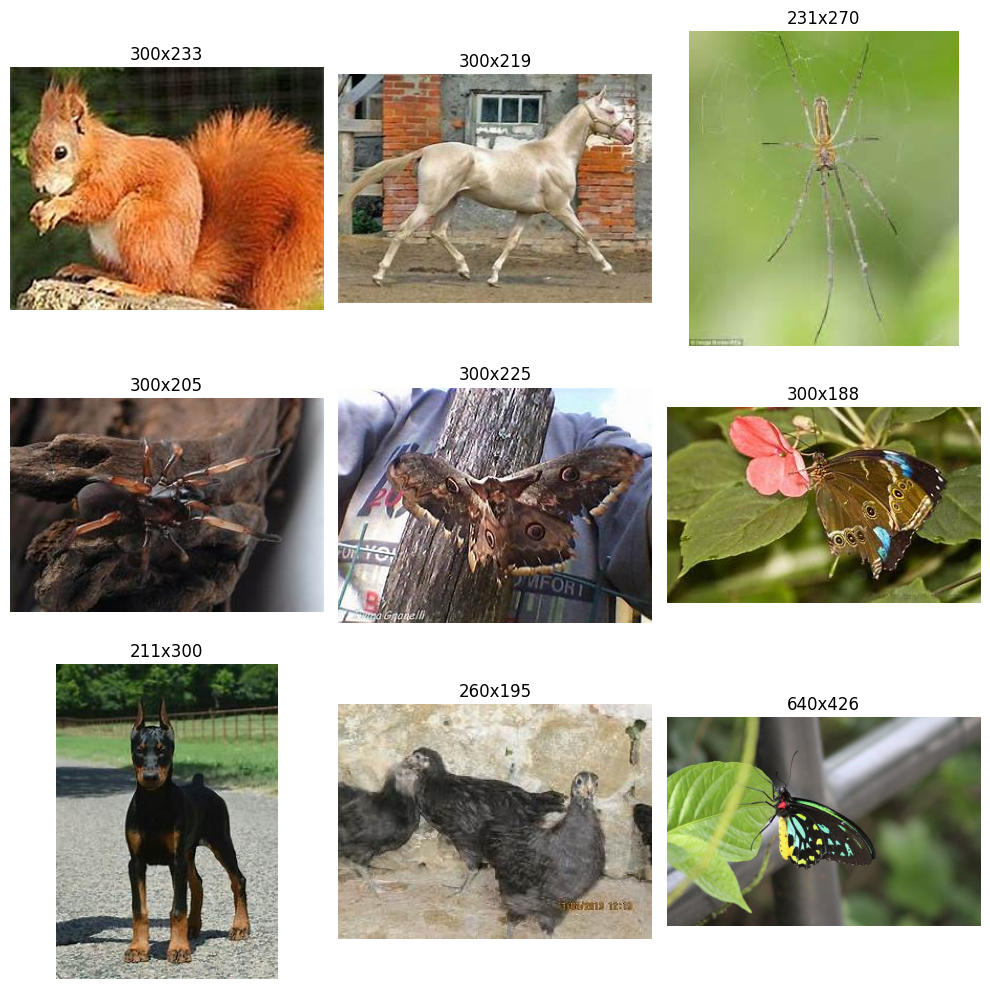

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Folder tempat gambar disimpan setelah diambil
target_dir = "./dataset/sample_balanced"

# Kumpulkan semua gambar dari folder target
all_images = []
for class_name in os.listdir(target_dir):
    class_path = os.path.join(target_dir, class_name)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)
                  if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        all_images.extend(images)

# Pilih 12 gambar secara acak
selected_images = random.sample(all_images, min(12, len(all_images)))

# Tampilkan gambar dalam grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, img_path in zip(axes.flatten(), selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"{img.size[0]}x{img.size[1]}")  # Menampilkan resolusi gambar
    ax.axis("off")

plt.tight_layout()
plt.show()

# Melakukan preprocessing gambar

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Folder tempat gambar disimpan setelah diambil
target_dir = "./dataset/sample_balanced"
processed_dir = "./dataset/processed_images"

# Pastikan folder tujuan ada
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Fungsi untuk preprocessing gambar
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    img = cv2.resize(img, target_size)  # Resize gambar
    img = img / 255.0  # Normalisasi nilai piksel (0-1)
    return img

# Iterasi setiap kelas dan lakukan preprocessing
for class_name in os.listdir(target_dir):
    class_path = os.path.join(target_dir, class_name)
    target_class_path = os.path.join(processed_dir, class_name)

    if os.path.isdir(class_path):
        if not os.path.exists(target_class_path):
            os.makedirs(target_class_path)

        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for img_name in tqdm(images, desc=f"Processing {class_name}"):
            img_path = os.path.join(class_path, img_name)
            processed_img = preprocess_image(img_path)

            # Simpan hasil preprocessing
            save_path = os.path.join(target_class_path, img_name)
            cv2.imwrite(save_path, (processed_img * 255).astype(np.uint8))

print("\nPreprocessing selesai. Semua gambar telah diproses dan disimpan di folder processed_images.")

Processing mucca: 100%|██████████| 1866/1866 [00:03<00:00, 545.50it/s]


Preprocessing selesai. Semua gambar telah diproses dan disimpan di folder processed_images.


# Membagi dataset menjadi Train, Validation dan Test

In [6]:
import os
import shutil
import random

# Folder sumber (dataset yang telah diproses)
source_dir = "./dataset/processed_images"
output_dir = "./dataset/split_dataset"

# Ratio split
train_ratio = 0.7
val_ratio = 0.15

def create_dirs(base_dir, categories):
    for category in categories:
        for split in ["train", "val", "test"]:
            split_path = os.path.join(base_dir, split, category)
            os.makedirs(split_path, exist_ok=True)

# Buat folder train, val, test
categories = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
create_dirs(output_dir, categories)

# Bagi dataset
for category in categories:
    category_path = os.path.join(source_dir, category)
    images = [img for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    train_split = int(len(images) * train_ratio)
    val_split = int(len(images) * (train_ratio + val_ratio))

    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    for img_name in train_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(output_dir, "train", category, img_name))

    for img_name in val_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(output_dir, "val", category, img_name))

    for img_name in test_images:
        shutil.copy(os.path.join(category_path, img_name), os.path.join(output_dir, "test", category, img_name))

print("Dataset berhasil dibagi menjadi train, validation, dan test dengan rasio 70:15:15.")

Dataset berhasil dibagi menjadi train, validation, dan test dengan rasio 70:15:15.


# Membangun Model CNN dengan Menggunakan Transfer Learning

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
# Load model pre-trained MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layer pre-trained

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.applications import MobileNetV2
import os

# Direktori dataset yang telah dibagi
data_dir = "./dataset/split_dataset"
img_size = (224, 224)
batch_size = 128

# Load dataset dengan ImageDataGenerator
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# Get the number of classes from the train generator
num_classes = train_generator.num_classes

# Gabungkan Xception dengan CNN yang lebih kompleks
model = Sequential([
    base_model,  # Xception sebagai feature extractor

    # Lapisan tambahan CNN yang lebih kompleks
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    # MaxPooling2D(2,2),

    GlobalAveragePooling2D(),  # Mengurangi dimensi fitur

    Dense(64, activation='relu'),
    Dropout(0.25),

    Dense(32, activation='relu'),
    Dropout(0.25),

    # Sesuaikan jumlah kelas dengan num_classes
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Lihat arsitektur model
model.summary()

Found 22203 images belonging to 10 classes.
Found 6603 images belonging to 10 classes.
Found 6605 images belonging to 10 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 512)           │       5,898,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,645,930 (36.80 MB)

 Trainable params: 7,386,154 (28.18 MB)

 Non-trainable params: 2,259,776 (8.62 MB)

In [12]:
# Tambahkan callbacks (EarlyStopping dan ModelCheckpoint)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    batch_size=batch_size,
    epochs=30,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5968 - loss: 1.2393

174/174 ━━━━━━━━━━━━━━━━━━━━ 113s 518ms/step - accuracy: 0.5977 - loss: 1.2370 - val_accuracy: 0.9326 - val_loss: 0.3324
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9047 - loss: 0.3880

174/174 ━━━━━━━━━━━━━━━━━━━━ 65s 373ms/step - accuracy: 0.9047 - loss: 0.3879 - val_accuracy: 0.9555 - val_loss: 0.1760
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9428 - loss: 0.2408

174/174 ━━━━━━━━━━━━━━━━━━━━ 63s 364ms/step - accuracy: 0.9428 - loss: 0.2407 - val_accuracy: 0.9700 - val_loss: 0.1200
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9632 - loss: 0.1528

174/174 ━━━━━━━━━━━━━━━━━━━━ 63s 361ms/step - accuracy: 0.9632 - loss: 0.1527 - val_accuracy: 0.9723 - val_loss: 0.1035
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9770 - loss: 0.1025

174/174 ━━━━━━━━━━━━━━━━━━━━ 62s 354ms/step - accuracy: 0.9770 - loss: 0.1024 - val_accuracy: 0.9747 - val_loss: 0.1007
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9858 - loss: 0.0719

174/174 ━━━━━━━━━━━━━━━━━━━━ 63s 360ms/step - accuracy: 0.9858 - loss: 0.0719 - val_accuracy: 0.9821 - val_loss: 0.0811
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 61s 352ms/step - accuracy: 0.9882 - loss: 0.0563 - val_accuracy: 0.9794 - val_loss: 0.0913
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 62s 354ms/step - accuracy: 0.9923 - loss: 0.0399 - val_accuracy: 0.9835 - val_loss: 0.0834
Epoch 9/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 62s 357ms/step - accuracy: 0.9935 - loss: 0.0331 - val_accuracy: 0.9830 - val_loss: 0.0833
Epoch 10/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 63s 362ms/step - accuracy: 0.9924 - loss: 0.0338 - val_accuracy: 0.9806 - val_loss: 0.0962
Epoch 11/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 63s 361ms/step - accuracy: 0.9904 - loss: 0.0407 - val_accuracy: 0.9803 - val_loss: 0.0971


In [13]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.9810 - loss: 0.0811
Test Accuracy: 0.9814


# Membuat Plot Akurasi dan Loss Model

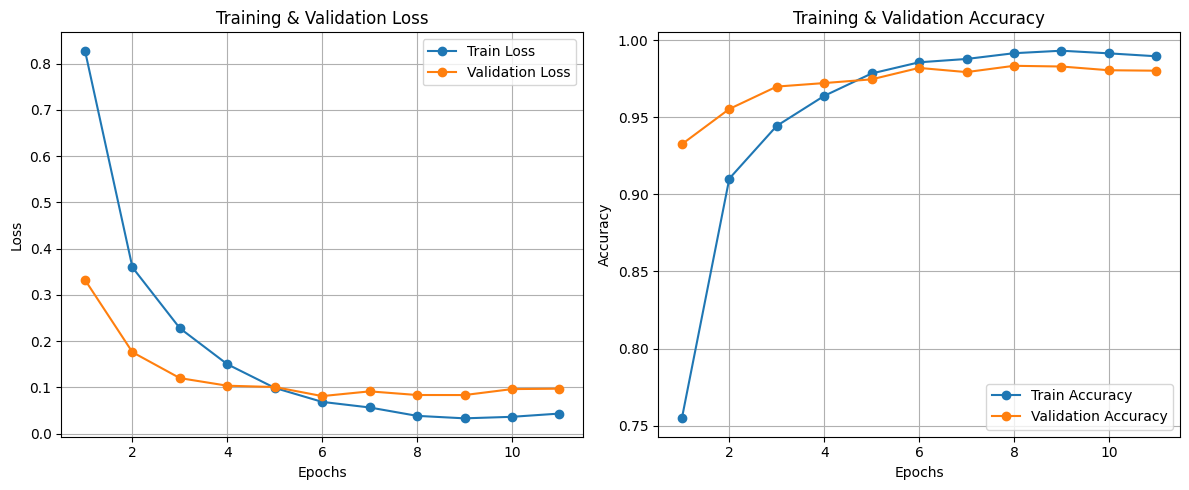

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    """Fungsi untuk menampilkan plot akurasi dan loss dari history training."""
    epochs = np.arange(1, len(history.history['loss']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
plot_history(history)

# Menyimpan Model

In [16]:
!pip install tensorflow
import tensorflow as tf
import tensorflowjs as tfjs

In [17]:
import tensorflow as tf
import os

# Direktori untuk menyimpan model
save_dir = "./saved_models"
os.makedirs(save_dir, exist_ok=True)

# Simpan dalam format SavedModel
saved_model_path = os.path.join(save_dir, "saved_model")
tf.saved_model.save(model, saved_model_path)
print(f"Model disimpan dalam format SavedModel di {saved_model_path}")

# Simpan dalam format TF-Lite
tflite_model_path = os.path.join(save_dir, "model.tflite")
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)
print(f"Model disimpan dalam format TF-Lite di {tflite_model_path}")

# Simpan dalam format TensorFlow.js
tfjs_target_dir = os.path.join(save_dir, "tfjs_model")
tfjs.converters.save_keras_model(model, tfjs_target_dir)
print(f"Model disimpan dalam format TensorFlow.js di {tfjs_target_dir}")

Model disimpan dalam format SavedModel di ./saved_models/saved_model


Model disimpan dalam format TF-Lite di ./saved_models/model.tflite
failed to lookup keras version from the file,
    this is likely a weight only file
Model disimpan dalam format TensorFlow.js di ./saved_models/tfjs_model


# Melakukan Inference Terhadap Model Yang Telah Disimpan

In [19]:
# Melakukan inference dengan model SavedModel pada setiap kelas
def predict_savedmodel_per_class(class_dirs, loaded_model):
    results = {}
    # Get the inference function from the loaded model
    infer = loaded_model.signatures["serving_default"]
    for class_name, img_paths in class_dirs.items():
        class_results = []
        for img_path in img_paths:
            # Load dan preprocess gambar
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array.astype(np.float32) / 255.0

            # Lakukan prediksi
            input_tensor = tf.constant(img_array)
            # Pass the input tensor to the inference function
            predictions = infer(input_tensor)
            # Get the output tensor from the predictions dictionary
            # Assuming there is only one output, get the first key
            output_key = list(predictions.keys())[0] # Get the output key dynamically
            predicted_class = np.argmax(predictions[output_key].numpy(), axis=1)[0]
            class_results.append(predicted_class)

        results[class_name] = class_results
    return results

# Load the SavedModel using tf.saved_model.load
from tensorflow.keras.preprocessing import image # Import the image module
import numpy as np
loaded_model = tf.saved_model.load(saved_model_path)
print("Model berhasil dimuat dari SavedModel.")

# Contoh inference pada beberapa kelas
test_images_per_class = {
    "Cane": ["/content/dataset/split_dataset/test/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg"],
    "Cavallo": ["/content/dataset/split_dataset/test/cavallo/OIP--r8AEKpQpAt-caqPq_LK-gHaGN.jpeg"],
    "Elefante" :["/content/dataset/split_dataset/test/elefante/OIP-0b38oXc_wRpF6Dr6Lsfc9QHaE7.jpeg"],
    "Farfalla" :["/content/dataset/split_dataset/test/farfalla/OIP-09Xo0wT0Ek5A_d_bUKgUogHaIj.jpeg"],
    "Gallina" :["/content/dataset/split_dataset/test/gallina/1039.jpeg"],
    "Gatto" :["/content/dataset/split_dataset/test/gatto/1019.jpeg"],
    "Mucca" :["/content/dataset/split_dataset/test/mucca/OIP-06Pazp4Kke9y83IfdQ5vQwHaFT.jpeg"],
    "Pecora" :["/content/dataset/split_dataset/test/pecora/OIP-34pBW5bI2ePObGqJJx4gJgHaEu.jpeg"],
    "Ragno":["/content/dataset/split_dataset/test/ragno/OIP-4pfZizpZ7jRcs0LhXiRa6wHaFj.jpeg"],
    "Scoiattolo" :["/content/dataset/split_dataset/test/scoiattolo/OIP-2qGc6MkDYXePcg3fviwc7QHaEO.jpeg"],
}

predictions = predict_savedmodel_per_class(test_images_per_class, loaded_model)
for class_name, preds in predictions.items():
    print(f"Prediksi untuk kelas {class_name}: {preds}")

Model berhasil dimuat dari SavedModel.
Prediksi untuk kelas Cane: [0]
Prediksi untuk kelas Cavallo: [1]
Prediksi untuk kelas Elefante: [2]
Prediksi untuk kelas Farfalla: [3]
Prediksi untuk kelas Gallina: [4]
Prediksi untuk kelas Gatto: [5]
Prediksi untuk kelas Mucca: [6]
Prediksi untuk kelas Pecora: [7]
Prediksi untuk kelas Ragno: [8]
Prediksi untuk kelas Scoiattolo: [9]


In [20]:
!touch requirements.txt
!pip freeze > requirements.txt

In [21]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.5.0
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.